# Final Simulation
## Jack Farmer, 8 December 2023
### PHYS 541 Modelling & Simulation

Simulating UNO

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
from uno import Deck, Player

This simulates the repeated playing of the UNO card game, looking for how many cards each player had by the end of each game simulation. Some players end up with 0 (winning the game), others have 10 or more

The variables are as follows:
- num_games --> how many games to be played
- num_turns_per_game --> how many turns before stopping the simulation (will run nearly indefinitely)
- num_players --> how many players per simulation
- num_cards --> how many cards dealt to each player at start of game

There are multiple stages to the simulation to show the differences and efficacy of the changes

Please run all cells in succession to provide best results

In [46]:
# Set variable values here
num_games = 100
num_turns_per_game = 50
num_players = 2
num_cards = 7

## Next Step

This is where the game logic is processed.

A typical game of uno involves 2 or more players each being dealt 7 cards, but these variables can be changed above.

Each player will take a turn playing each card in their hand until they either run out or can no longer play a card. If they run out, they win. If they cannot play a card, they must draw another.

The game continues until one player has won, recording the number of turns taken to win.

In [47]:
def is_valid_move(played_card, top_card):
    return played_card.color == top_card.color or played_card.value == top_card.value

def check_reshuffle(deck, discarded):
    if len(deck.cards) == 0:
        deck.reshuffle_deck(discarded)

def play_game(n_players=2, n_cards=7):
    total_turns = 0
    player_cards = []
    players = [Player(f"P{i+1}") for i in range(n_players)] # create players
    deck = Deck() # deck of cards
    deck.shuffle_deck() # shuffle the deck
    discarded = [deck.draw_card()] # initialize discard pile
    
    for p in players:
        p.draw_cards(deck, n_cards)
        
    cur_player_ind = 0
    while True:
        if cur_player_ind == 0:
            total_turns += 1
        if total_turns == num_turns_per_game:
            break
            #print(f"Total turns: {total_turns}")
            
        cur_player = players[cur_player_ind]
        
        card_ind_played = cur_player.get_valid_card(discarded)
        if card_ind_played is None: 
            check_reshuffle(deck, discarded) # called anytime before new cards dealt
            cur_player.draw_cards(deck, num_cards=1)
            continue
                
        # play valid card
        cur_player.play(card_ind_played, discarded)
                
        # player has won!
        if len(cur_player.cards) == 0:
            break
            
        # play special cards
        played_card = discarded[-1]
        if played_card.value == "Skip":
            cur_player_ind = (cur_player_ind + 2) % len(players)
        elif played_card.value == 'Reverse':
            players.reverse()
            cur_player_ind = (cur_player_ind + 1) % len(players)
            
        # move to next player
        cur_player_ind = (cur_player_ind + 1) % len(players)
        
    for p in players:
        player_cards.append(len(p.cards))
    return player_cards    


In [48]:
p1_cards_2p = []
p2_cards_2p = []
for i in range(num_games):
    game_cards = play_game(n_players=num_players, n_cards=num_cards)
    p1_cards_2p.append(game_cards[0])
    p2_cards_2p.append(game_cards[1])
print(f"p1 cards {p1_cards_2p}")
print(f"p2 cards {p2_cards_2p}")

cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuf

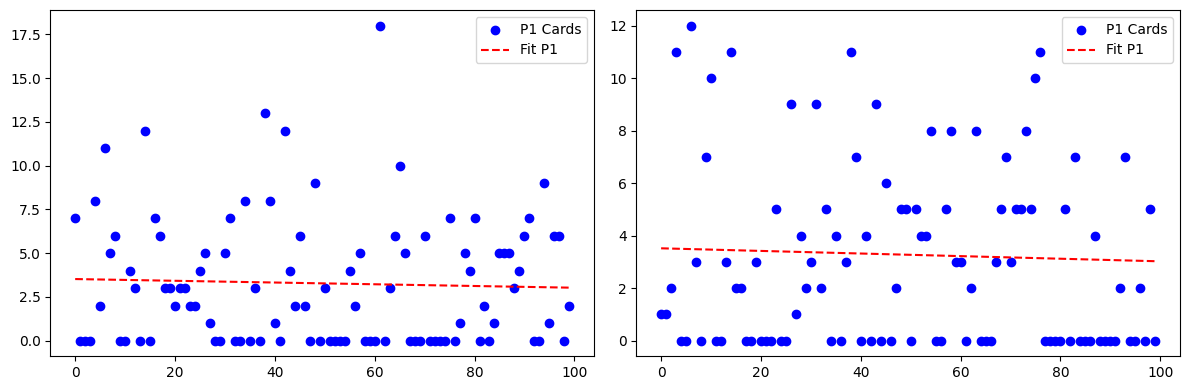

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
## do the plotting here

x_val_1 = np.arange(len(p1_cards_2p))
ax[0].scatter(x_val_1, p1_cards_2p, label="P1 Cards", color='blue')

fit_coef_1 = np.polyfit(x_val_1, p1_cards_2p, 1)
fit_line_1 = np.polyval(fit_coef_1, x_val_1)
ax[0].plot(x_val_1, fit_line_1, color='red', linestyle='--', label='Fit P1')
ax[0].legend()

x_val_2 = np.arange(len(p2_cards_2p))
ax[1].scatter(x_val_2, p2_cards_2p, label="P1 Cards", color='blue')

fit_coef_2 = np.polyfit(x_val_2, p1_cards_2p, 1)
fit_line_2 = np.polyval(fit_coef_2, x_val_2)
ax[1].plot(x_val_2, fit_line_2, color='red', linestyle='--', label='Fit P1')
ax[1].legend()

plt.tight_layout()
plt.show()

In [49]:
num_players = 3

p1_cards_3p = []
p2_cards_3p = []
p3_cards_3p = []
for i in range(num_games):
    game_cards = play_game(n_players=num_players, n_cards=num_cards)
    p1_cards_3p.append(game_cards[0])
    p2_cards_3p.append(game_cards[1])
    p3_cards_3p.append(game_cards[2])
print(f"p1 cards {p1_cards_3p}")
print(f"p2 cards {p2_cards_3p}")
print(f"p2 cards {p3_cards_3p}")

cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuf

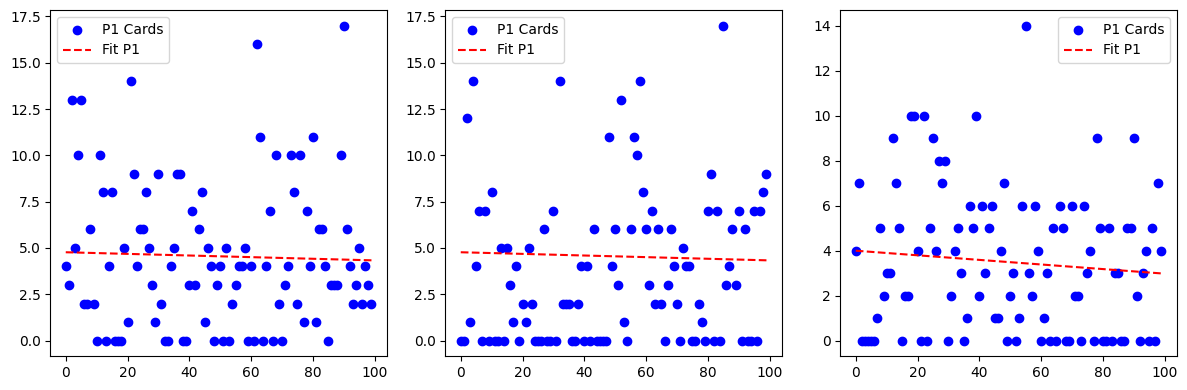

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
## do the plotting here

x_val_1 = np.arange(len(p1_cards_3p))
ax[0].scatter(x_val_1, p1_cards_3p, label="P1 Cards", color='blue')

fit_coef_1 = np.polyfit(x_val_1, p1_cards_3p, 1)
fit_line_1 = np.polyval(fit_coef_1, x_val_1)
ax[0].plot(x_val_1, fit_line_1, color='red', linestyle='--', label='Fit P1')
ax[0].legend()

x_val_2 = np.arange(len(p2_cards_3p))
ax[1].scatter(x_val_2, p2_cards_3p, label="P1 Cards", color='blue')

fit_coef_2 = np.polyfit(x_val_2, p1_cards_3p, 1)
fit_line_2 = np.polyval(fit_coef_2, x_val_2)
ax[1].plot(x_val_2, fit_line_2, color='red', linestyle='--', label='Fit P1')
ax[1].legend()

x_val_3 = np.arange(len(p3_cards_3p))
ax[2].scatter(x_val_3, p3_cards_3p, label="P1 Cards", color='blue')

fit_coef_3 = np.polyfit(x_val_3, p3_cards_3p, 1)
fit_line_3 = np.polyval(fit_coef_3, x_val_3)
ax[2].plot(x_val_3, fit_line_3, color='red', linestyle='--', label='Fit P1')
ax[2].legend()

plt.tight_layout()
plt.show()

In [50]:
num_players = 4

p1_cards_4p = []
p2_cards_4p = []
p3_cards_4p = []
p4_cards_4p = []
for i in range(num_games):
    game_cards = play_game(n_players=num_players, n_cards=num_cards)
    p1_cards_4p.append(game_cards[0])
    p2_cards_4p.append(game_cards[1])
    p3_cards_4p.append(game_cards[2])
    p4_cards_4p.append(game_cards[3])
print(f"p1 cards {p1_cards_4p}")
print(f"p2 cards {p2_cards_4p}")
print(f"p2 cards {p3_cards_4p}")
print(f"p2 cards {p4_cards_4p}")


cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuffled
cards shuf

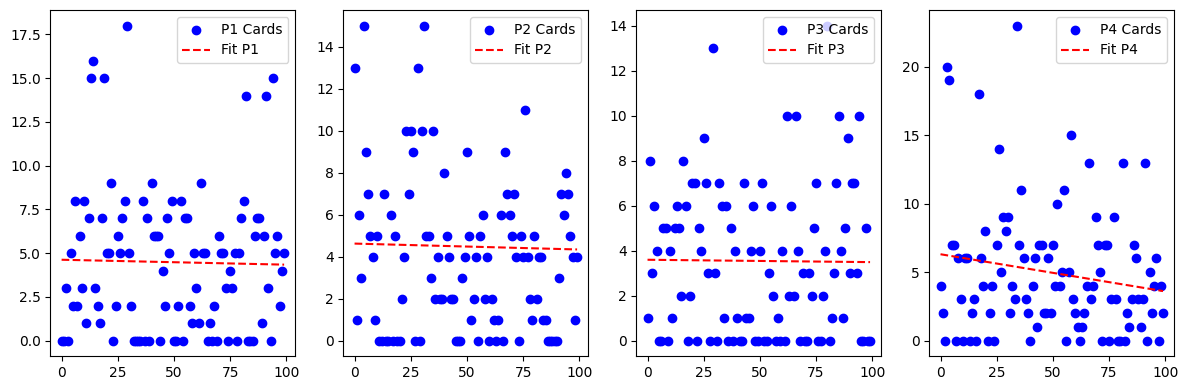

In [55]:
## plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

x_val_1 = np.arange(len(p1_cards_4p))
ax[0].scatter(x_val_1, p1_cards_4p, label="P1 Cards", color='blue')

fit_coef_1 = np.polyfit(x_val_1, p1_cards_4p, 1)
fit_line_1 = np.polyval(fit_coef_1, x_val_1)
ax[0].plot(x_val_1, fit_line_1, color='red', linestyle='--', label='Fit P1')
ax[0].legend()

x_val_2 = np.arange(len(p2_cards_4p))
ax[1].scatter(x_val_2, p2_cards_4p, label="P2 Cards", color='blue')

fit_coef_2 = np.polyfit(x_val_2, p1_cards_4p, 1)
fit_line_2 = np.polyval(fit_coef_2, x_val_2)
ax[1].plot(x_val_2, fit_line_2, color='red', linestyle='--', label='Fit P2')
ax[1].legend()

x_val_3 = np.arange(len(p3_cards_4p))
ax[2].scatter(x_val_3, p3_cards_4p, label="P3 Cards", color='blue')

fit_coef_3 = np.polyfit(x_val_3, p3_cards_4p, 1)
fit_line_3 = np.polyval(fit_coef_3, x_val_3)
ax[2].plot(x_val_3, fit_line_3, color='red', linestyle='--', label='Fit P3')
ax[2].legend()

x_val_4 = np.arange(len(p4_cards_4p))
ax[3].scatter(x_val_4, p4_cards_4p, label="P4 Cards", color='blue')

fit_coef_4 = np.polyfit(x_val_4, p4_cards_4p, 1)
fit_line_4 = np.polyval(fit_coef_4, x_val_4)
ax[3].plot(x_val_4, fit_line_4, color='red', linestyle='--', label='Fit P4')
ax[3].legend()

plt.tight_layout()
plt.show()

In [ ]:
## show differences / similarities in plots